In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime



Objectives

To predict the number of accidents using environmental factors or weather conditions. 

Null Hypothesis 1: Environmental factors do not contribute to car accidents significantly and cannot be used to predict the number of accidents.

Alternate Hypothesis: Environmental factors can be used to predict the number of accidents.


## Load The Data<a id='3.4_Load_The_Data'></a>

In [3]:
df = pd.read_csv(r'C:\Users\Shweta\Documents\gitrepo\Capstonetwo\USaccidentsdata_cleanednexplored.csv', index_col=False)

In [4]:
# Changing settings in head function to view all columns.
pd.set_option('display.max_columns', 55)
pd.options.display.max_columns = 55
pd.set_option('display.max_columns', None)
df.head(50)

,Weather_Date,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Time,Month&Year,StartDate,StartTime,EndDate,EndTime,Day_Weather,Year,Month
0,2016-03-22,5233,A-5234,2,2016-03-22 19:14:41,2016-03-23 01:14:41,33.911330,-118.168190,33.915850,-118.188400,1.200,At I-710/Garfield Ave - Accident.,NaN,I-105 W,R,Paramount,Los Angeles,CA,90723,US,US/Pacific,KLGB,2016-03-22 18:53:00,63.0,NaN,58.0,30.00,10.0,West,12.7,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,18:53:00,Mar 2016,2016-03-22,19:14:41,2016-03-23,01:14:41,Fair,2016,3
1,2016-03-22,5234,A-5235,2,2016-03-22 19:43:16,2016-03-23 01:43:16,33.892380,-118.044080,33.894940,-118.048820,0.324,At Carmenita Rd/Exit 119 - Accident.,NaN,I-5 N,R,Santa Fe Springs,Los Angeles,CA,90670,US,US/Pacific,KFUL,2016-03-22 19:53:00,63.0,NaN,50.0,29.97,10.0,West,5.8,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,19:53:00,Mar 2016,2016-03-22,19:43:16,2016-03-23,01:43:16,Fair,2016,3
2,2016-03-22,5235,A-5236,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.092560,-118.206220,34.092560,-118.206220,0.000,At Avenue 43 - Accident.,NaN,CA-110 N,R,Los Angeles,Los Angeles,CA,90031,US,US/Pacific,KCQT,2016-03-22 19:47:00,64.0,NaN,24.0,30.00,10.0,NNW,9.2,NaN,Fair,False,False,False,False,False,False,False,False,False,True,False,False,False,Night,Night,Day,Day,19:47:00,Mar 2016,2016-03-22,19:36:44,2016-03-23,01:36:44,Fair,2016,3
3,2016-03-22,5236,A-5237,2,2016-03-22 20:12:40,2016-03-23 02:12:40,33.916190,-118.239150,33.916190,-118.239030,0.007,At Wilmington Ave - Accident.,700.0,W El Segundo Blvd,L,Compton,Los Angeles,CA,90222,US,US/Pacific,KHHR,2016-03-22 19:53:00,62.1,NaN,56.0,30.02,10.0,WNW,5.8,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Day,19:53:00,Mar 2016,2016-03-22,20:12:40,2016-03-23,02:12:40,Fair,2016,3
4,2016-03-22,5238,A-5239,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.948190,-118.279730,33.946760,-118.279750,0.099,At Century Blvd - Accident.,NaN,I-110 S,R,Los Angeles,Los Angeles,CA,90003,US,US/Pacific,KHHR,2016-03-22 20:53:00,64.0,NaN,23.0,30.02,10.0,NNW,11.5,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,20:53:00,Mar 2016,2016-03-22,20:59:43,2016-03-23,02:59:43,Fair,2016,3
5,2016-03-22,5239,A-5240,2,2016-03-22 21:49:06,2016-03-23 03:49:06,33.839080,-118.263010,33.841370,-118.265250,0.204,At Avalon Blvd/Exit 35 - Accident.,NaN,I-405 N,R,Carson,Los Angeles,CA,90746,US,US/Pacific,KHHR,2016-03-22 21:53:00,63.0,NaN,26.0,30.01,10.0,NW,19.6,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,21:53:00,Mar 2016,2016-03-22,21:49:06,2016-03-23,03:49:06,Fair,2016,3
6,2016-03-23,5241,A-5242,4,2016-03-23 01:09:47,2016-03-23 07:09:47,33.934570,-118.176950,33.905110,-118.184250,2.078,Closed between Imperial Hwy and I-105 - Road c...,NaN,Long Beach Fwy S,R,South Gate,Los Angeles,CA,90280,US,US/Pacific,KCQT,2016-03-23 00:47:00,60.1,NaN,32.0,30.03,10.0,Variable,4.6,NaN,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,00:47:00,Mar 2016,2016-03-23,01:09:47,2016-03-23,07:09:47,Fair,2016,3
7,2016-03-23,5244,A-5245,2,2016-03-23 04:52:23,2016-03-23 10:52:23,34.300880,-118.477150,34.305510,-118.481600,0.408,At Roxford St/Exit 159 - Accident. Carpool lan...,NaN,I-5 N,R,Sylmar,Los Angeles,CA,91342,US,US/Pa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226618 entries, 0 to 226617
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Weather_Date           226618 non-null  object 
 1   Unnamed: 0             226618 non-null  int64  
 2   ID                     226618 non-null  object 
 3   Severity               226618 non-null  int64  
 4   Start_Time             226618 non-null  object 
 5   End_Time               226618 non-null  object 
 6   Start_Lat              226618 non-null  float64
 7   Start_Lng              226618 non-null  float64
 8   End_Lat                226618 non-null  float64
 9   End_Lng                226618 non-null  float64
 10  Distance(mi)           226618 non-null  float64
 11  Description            226618 non-null  object 
 12  Number                 60499 non-null   float64
 13  Street                 226618 non-null  object 
 14  Side                   226618 non-nu

##  Preparing data for Time series split <a id='4.6_Train/Test_Split'></a>

We will convert StartDate into date time type

In [6]:
df['StartDate'] = pd.to_datetime(df.StartDate)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226618 entries, 0 to 226617
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Weather_Date           226618 non-null  object        
 1   Unnamed: 0             226618 non-null  int64         
 2   ID                     226618 non-null  object        
 3   Severity               226618 non-null  int64         
 4   Start_Time             226618 non-null  object        
 5   End_Time               226618 non-null  object        
 6   Start_Lat              226618 non-null  float64       
 7   Start_Lng              226618 non-null  float64       
 8   End_Lat                226618 non-null  float64       
 9   End_Lng                226618 non-null  float64       
 10  Distance(mi)           226618 non-null  float64       
 11  Description            226618 non-null  object        
 12  Number                 60499 non-null   floa

In [8]:
#Set the data frame index to be time if it is not so.
df.set_index('StartDate', inplace=True)

In [9]:
#Sort time frame by time: it is important to sort dataframe by time before the time series split
df.sort_index(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226618 entries, 2016-03-22 to 2021-12-31
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Weather_Date           226618 non-null  object 
 1   Unnamed: 0             226618 non-null  int64  
 2   ID                     226618 non-null  object 
 3   Severity               226618 non-null  int64  
 4   Start_Time             226618 non-null  object 
 5   End_Time               226618 non-null  object 
 6   Start_Lat              226618 non-null  float64
 7   Start_Lng              226618 non-null  float64
 8   End_Lat                226618 non-null  float64
 9   End_Lng                226618 non-null  float64
 10  Distance(mi)           226618 non-null  float64
 11  Description            226618 non-null  object 
 12  Number                 60499 non-null   float64
 13  Street                 226618 non-null  object 
 14  Side                

In [11]:
df.head()

,Weather_Date,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Time,Month&Year,StartTime,EndDate,EndTime,Day_Weather,Year,Month
StartDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-22,2016-03-22,5233,A-5234,2,2016-03-22 19:14:41,2016-03-23 01:14:41,33.91133,-118.16819,33.91585,-118.18840,1.200,At I-710/Garfield Ave - Accident.,NaN,I-105 W,R,Paramount,Los Angeles,CA,90723,US,US/Pacific,KLGB,2016-03-22 18:53:00,63.0,NaN,58.0,30.00,10.0,West,12.7,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,18:53:00,Mar 2016,19:14:41,2016-03-23,01:14:41,Fair,2016,3
2016-03-22,2016-03-22,5234,A-5235,2,2016-03-22 19:43:16,2016-03-23 01:43:16,33.89238,-118.04408,33.89494,-118.04882,0.324,At Carmenita Rd/Exit 119 - Accident.,NaN,I-5 N,R,Santa Fe Springs,Los Angeles,CA,90670,US,US/Pacific,KFUL,2016-03-22 19:53:00,63.0,NaN,50.0,29.97,10.0,West,5.8,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,19:53:00,Mar 2016,19:43:16,2016-03-23,01:43:16,Fair,2016,3
2016-03-22,2016-03-22,5235,A-5236,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.09256,-118.20622,34.09256,-118.20622,0.000,At Avenue 43 - Accident.,NaN,CA-110 N,R,Los Angeles,Los Angeles,CA,90031,US,US/Pacific,KCQT,2016-03-22 19:47:00,64.0,NaN,24.0,30.00,10.0,NNW,9.2,NaN,Fair,False,False,False,False,False,False,False,False,False,True,False,False,False,Night,Night,Day,Day,19:47:00,Mar 2016,19:36:44,2016-03-23,01:36:44,Fair,2016,3
2016-03-22,2016-03-22,5236,A-5237,2,2016-03-22 20:12:40,2016-03-23 02:12:40,33.91619,-118.23915,33.91619,-118.23903,0.007,At Wilmington Ave - Accident.,700.0,W El Segundo Blvd,L,Compton,Los Angeles,CA,90222,US,US/Pacific,KHHR,2016-03-22 19:53:00,62.1,NaN,56.0,30.02,10.0,WNW,5.8,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Day,19:53:00,Mar 2016,20:12:40,2016-03-23,02:12:40,Fair,2016,3
2016-03-22,2016-03-22,5238,A-5239,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.94819,-118.27973,33.94676,-118.27975,0.099,At Century Blvd - Accident.,NaN,I-110 S,R,Los Angeles,Los Angeles,CA,90003,US,US/Pacific,KHHR,2016-03-22 20:53:00,64.0,NaN,23.0,30.02,10.0,NNW,11.5,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,20:53:00,Mar 2016,20:59:43,2016-03-23,02:59:43,Fair,2016,3


In [12]:
#drop column Unnamed:0, ID, 
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('ID', axis=1)

In [13]:
df.head()

,Weather_Date,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Time,Month&Year,StartTime,EndDate,EndTime,Day_Weather,Year,Month
StartDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-22,2016-03-22,2,2016-03-22 19:14:41,2016-03-23 01:14:41,33.91133,-118.16819,33.91585,-118.18840,1.200,At I-710/Garfield Ave - Accident.,NaN,I-105 W,R,Paramount,Los Angeles,CA,90723,US,US/Pacific,KLGB,2016-03-22 18:53:00,63.0,NaN,58.0,30.00,10.0,West,12.7,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,18:53:00,Mar 2016,19:14:41,2016-03-23,01:14:41,Fair,2016,3
2016-03-22,2016-03-22,2,2016-03-22 19:43:16,2016-03-23 01:43:16,33.89238,-118.04408,33.89494,-118.04882,0.324,At Carmenita Rd/Exit 119 - Accident.,NaN,I-5 N,R,Santa Fe Springs,Los Angeles,CA,90670,US,US/Pacific,KFUL,2016-03-22 19:53:00,63.0,NaN,50.0,29.97,10.0,West,5.8,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,19:53:00,Mar 2016,19:43:16,2016-03-23,01:43:16,Fair,2016,3
2016-03-22,2016-03-22,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.09256,-118.20622,34.09256,-118.20622,0.000,At Avenue 43 - Accident.,NaN,CA-110 N,R,Los Angeles,Los Angeles,CA,90031,US,US/Pacific,KCQT,2016-03-22 19:47:00,64.0,NaN,24.0,30.00,10.0,NNW,9.2,NaN,Fair,False,False,False,False,False,False,False,False,False,True,False,False,False,Night,Night,Day,Day,19:47:00,Mar 2016,19:36:44,2016-03-23,01:36:44,Fair,2016,3
2016-03-22,2016-03-22,2,2016-03-22 20:12:40,2016-03-23 02:12:40,33.91619,-118.23915,33.91619,-118.23903,0.007,At Wilmington Ave - Accident.,700.0,W El Segundo Blvd,L,Compton,Los Angeles,CA,90222,US,US/Pacific,KHHR,2016-03-22 19:53:00,62.1,NaN,56.0,30.02,10.0,WNW,5.8,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Day,19:53:00,Mar 2016,20:12:40,2016-03-23,02:12:40,Fair,2016,3
2016-03-22,2016-03-22,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.94819,-118.27973,33.94676,-118.27975,0.099,At Century Blvd - Accident.,NaN,I-110 S,R,Los Angeles,Los Angeles,CA,90003,US,US/Pacific,KHHR,2016-03-22 20:53:00,64.0,NaN,23.0,30.02,10.0,NNW,11.5,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,20:53:00,Mar 2016,20:59:43,2016-03-23,02:59:43,Fair,2016,3


In [14]:
#checking for null values
df.isnull().values.any()

True

In [15]:
# checking for null values in each column. 
df.isnull().sum().sort_values()

Weather_Date                  0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Turning_Loop                  0
Weather_Time                  0
Month&Year                    0
StartTime                     0
EndDate                       0
EndTime                       0
Day_Weather                   0
Weather_Condition             0
Year                          0
Month                         0
Street                        0
End_Lng                       0
Distance(mi)                  0
Description                   0
Start_Lng                     0
Start_Lat                     0
Side                          0
State                         0
Zipcode 

The data is now indexed by date, as time series data ought to be.



## Feature Engineering

We are trying to emphasize the role of weather conditions on road accidents. We could do that in several ways. 
First we could forecast the number of accidents that occur. To forecast we can use the weather conditions and the previous/past accident data. In this case, it becomes a multivariate time series forecasting problem. 

Second, we could also treat this as a Multivariate Time Series Classification problem and check what kinds of accidents(severity) occur under what kind of weather kinds. We would then be classifying the accidents based on weather conditions. 

We could also start with the first part now and then later improvise the study by incorporating the second part.
Hence we shall focus on the first part of predicting the total number of accidents in this study. 

To start with, we will have to create our target variable- Total accidents in a day.

In [19]:
#We will create a copy of our dataset
df1 = df

In [20]:
df1.head()

,Weather_Date,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Time,Month&Year,StartTime,EndDate,EndTime,Day_Weather,Year,Month
StartDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-22,2016-03-22,2,2016-03-22 19:14:41,2016-03-23 01:14:41,33.91133,-118.16819,33.91585,-118.18840,1.200,At I-710/Garfield Ave - Accident.,NaN,I-105 W,R,Paramount,Los Angeles,CA,90723,US,US/Pacific,KLGB,2016-03-22 18:53:00,63.0,NaN,58.0,30.00,10.0,West,12.7,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,18:53:00,Mar 2016,19:14:41,2016-03-23,01:14:41,Fair,2016,3
2016-03-22,2016-03-22,2,2016-03-22 19:43:16,2016-03-23 01:43:16,33.89238,-118.04408,33.89494,-118.04882,0.324,At Carmenita Rd/Exit 119 - Accident.,NaN,I-5 N,R,Santa Fe Springs,Los Angeles,CA,90670,US,US/Pacific,KFUL,2016-03-22 19:53:00,63.0,NaN,50.0,29.97,10.0,West,5.8,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,19:53:00,Mar 2016,19:43:16,2016-03-23,01:43:16,Fair,2016,3
2016-03-22,2016-03-22,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.09256,-118.20622,34.09256,-118.20622,0.000,At Avenue 43 - Accident.,NaN,CA-110 N,R,Los Angeles,Los Angeles,CA,90031,US,US/Pacific,KCQT,2016-03-22 19:47:00,64.0,NaN,24.0,30.00,10.0,NNW,9.2,NaN,Fair,False,False,False,False,False,False,False,False,False,True,False,False,False,Night,Night,Day,Day,19:47:00,Mar 2016,19:36:44,2016-03-23,01:36:44,Fair,2016,3
2016-03-22,2016-03-22,2,2016-03-22 20:12:40,2016-03-23 02:12:40,33.91619,-118.23915,33.91619,-118.23903,0.007,At Wilmington Ave - Accident.,700.0,W El Segundo Blvd,L,Compton,Los Angeles,CA,90222,US,US/Pacific,KHHR,2016-03-22 19:53:00,62.1,NaN,56.0,30.02,10.0,WNW,5.8,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Day,19:53:00,Mar 2016,20:12:40,2016-03-23,02:12:40,Fair,2016,3
2016-03-22,2016-03-22,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.94819,-118.27973,33.94676,-118.27975,0.099,At Century Blvd - Accident.,NaN,I-110 S,R,Los Angeles,Los Angeles,CA,90003,US,US/Pacific,KHHR,2016-03-22 20:53:00,64.0,NaN,23.0,30.02,10.0,NNW,11.5,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,20:53:00,Mar 2016,20:59:43,2016-03-23,02:59:43,Fair,2016,3


In [21]:
# We take the total of accidents of each severity per day
df1=(df.pivot_table(index='StartDate', columns='Severity', aggfunc='size').add_prefix('Severity-'))
type(df1)

pandas.core.frame.DataFrame

In [25]:
df1.head()

Severity,Severity-1,Severity-2,Severity-3,Severity-4
StartDate,,,,
2016-03-22,NaN,6.0,NaN,NaN
2016-03-23,NaN,69.0,10.0,2.0
2016-03-24,NaN,32.0,4.0,6.0
2016-03-25,NaN,26.0,6.0,NaN
2016-03-26,NaN,2.0,2.0,NaN


Now we have a new dataframe which gives us just the total number of accidents under each severity type for each day.

In [26]:
#replace all NaN values with zeros
df1 = df1.fillna(0)

#convert 'rebounds' column from float to integer
df1['Severity-1'] = df1['Severity-1'].astype(int) 
df1['Severity-2'] = df1['Severity-2'].astype(int) 
df1['Severity-3'] = df1['Severity-3'].astype(int) 
df1['Severity-4'] = df1['Severity-4'].astype(int) 
#df1.replace(np.nan,0)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1984 entries, 2016-03-22 to 2021-12-31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Severity-1  1984 non-null   int32
 1   Severity-2  1984 non-null   int32
 2   Severity-3  1984 non-null   int32
 3   Severity-4  1984 non-null   int32
dtypes: int32(4)
memory usage: 46.5 KB


In [28]:
df1.head()

Severity,Severity-1,Severity-2,Severity-3,Severity-4
StartDate,,,,
2016-03-22,0,6,0,0
2016-03-23,0,69,10,2
2016-03-24,0,32,4,6
2016-03-25,0,26,6,0
2016-03-26,0,2,2,0


Can we merge this with our main dataset df to get the number of accidents each day? But this is still for the whole of LA county.

Due to the huge scale of data, it would be good if we apply analysis on a smaller sample data. 

In [16]:
df['Zipcode'].nunique()

16758

We could delete this or we could further narrow it down to a specific region. Lets analyse further.

In [17]:
df['Airport_Code'].nunique()

21

We are talking about 16000 Zipcodes for 21 airport codes. Clearly there is some error.

Text(0, 0.5, 'Total accidents from 2016 to 2021')

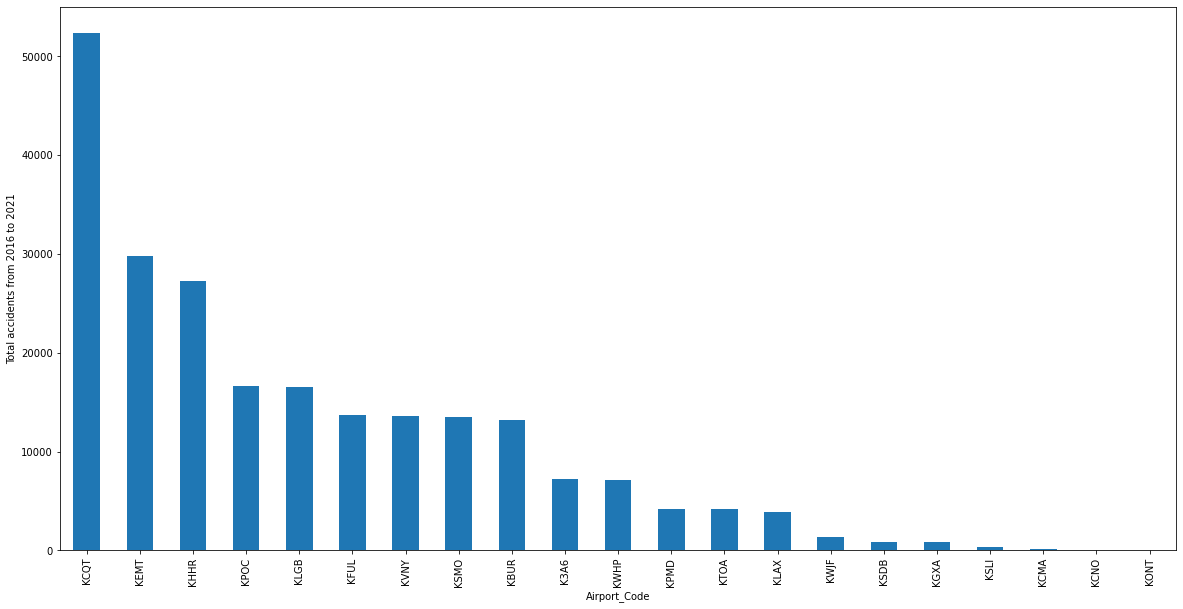

In [18]:
#lets analyse airport code wise information.
df['Airport_Code'].value_counts().plot(kind='bar', figsize=(20,10))
plt.xlabel("Airport_Code")
plt.ylabel("Total accidents from 2016 to 2021")

Since KCQT has the highest number of accidents. We could look at all accidents in KCQT to simplify our study.

In [19]:
# creating a new subset for Airport Code KCQT as it has the highest number of accidents 
df_new = df[(df['Airport_Code'] == 'KCQT')]
df_new.head()


,Weather_Date,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Time,Month&Year,StartTime,EndDate,EndTime,Day_Weather,Year,Month
StartDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-22,2016-03-22,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.09256,-118.206220,34.092560,-118.206220,0.000,At Avenue 43 - Accident.,NaN,CA-110 N,R,Los Angeles,Los Angeles,CA,90031,US,US/Pacific,KCQT,2016-03-22 19:47:00,64.0,NaN,24.0,30.00,10.0,NNW,9.2,NaN,Fair,False,False,False,False,False,False,False,False,False,True,False,False,False,Night,Night,Day,Day,19:47:00,Mar 2016,19:36:44,2016-03-23,01:36:44,Fair,2016,3
2016-03-23,2016-03-23,4,2016-03-23 01:09:47,2016-03-23 07:09:47,33.93457,-118.176950,33.905110,-118.184250,2.078,Closed between Imperial Hwy and I-105 - Road c...,NaN,Long Beach Fwy S,R,South Gate,Los Angeles,CA,90280,US,US/Pacific,KCQT,2016-03-23 00:47:00,60.1,NaN,32.0,30.03,10.0,Variable,4.6,NaN,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,00:47:00,Mar 2016,01:09:47,2016-03-23,07:09:47,Fair,2016,3
2016-03-23,2016-03-23,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.02330,-118.172880,34.021380,-118.173390,0.136,At Whittier Blvd/Olympic Blvd - Accident.,NaN,Long Beach Fwy S,R,Los Angeles,Los Angeles,CA,90022,US,US/Pacific,KCQT,2016-03-23 07:47:00,55.9,NaN,53.0,30.11,10.0,Calm,NaN,NaN,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,07:47:00,Mar 2016,07:59:47,2016-03-23,13:59:47,Fair,2016,3
2016-03-23,2016-03-23,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.14470,-118.278650,34.141040,-118.277840,0.257,At Colorado St - Accident.,NaN,Golden State Fwy S,R,Los Angeles,Los Angeles,CA,90027,US,US/Pacific,KCQT,2016-03-23 11:47:00,73.9,NaN,14.0,30.15,10.0,Calm,NaN,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,11:47:00,Mar 2016,11:50:32,2016-03-23,17:50:32,Fair,2016,3
2016-03-23,2016-03-23,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.09914,-118.251853,34.099817,-118.251396,0.054,At I-5/Golden State Fwy - Accident. Left lane ...,NaN,CA-2 S,R,Los Angeles,Los Angeles,CA,90039,US,US/Pacific,KCQT,2016-03-23 11:47:00,73.9,NaN,14.0,30.15,10.0,Calm,NaN,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,11:47:00,Mar 2016,12:16:45,2016-03-23,18:16:45,Fair,2016,3


We clearly dont need all the columns here. For instance, Weather Date and Start Date represent the same data and hence is creating redundancy.Similarly, there is no significance of time - Start time and End time or Latitude and Longitude.Distance(mi) indicates how many miles were affected by the accident. This is not important in the current study.Description, Number, Street, Side are to locate the exact spot of the accident. These are not the area of concern. Since the current study focuses only on the severity, environmental factors, Traffic conditions and Start time of the accident, rest of the data can all be safely omitted than to create unnecessary noise. 

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52372 entries, 2016-03-22 to 2021-12-31
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weather_Date           52372 non-null  object 
 1   Severity               52372 non-null  int64  
 2   Start_Time             52372 non-null  object 
 3   End_Time               52372 non-null  object 
 4   Start_Lat              52372 non-null  float64
 5   Start_Lng              52372 non-null  float64
 6   End_Lat                52372 non-null  float64
 7   End_Lng                52372 non-null  float64
 8   Distance(mi)           52372 non-null  float64
 9   Description            52372 non-null  object 
 10  Number                 16261 non-null  float64
 11  Street                 52372 non-null  object 
 12  Side                   52372 non-null  object 
 13  City                   52372 non-null  object 
 14  County                 52372 non-null

In [21]:
#subsetting with only required columns
df2=df_new[['Severity','Zipcode','Airport_Code','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Precipitation(in)','Day_Weather','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']]

In [22]:
df2.head(50)

,Severity,Zipcode,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Day_Weather,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
StartDate,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-22,2,90031,KCQT,64.0,NaN,24.0,30.00,10.0,NNW,9.2,NaN,Fair,False,False,False,False,False,False,False,False,False,True,False,False,False
2016-03-23,4,90280,KCQT,60.1,NaN,32.0,30.03,10.0,Variable,4.6,NaN,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False
2016-03-23,3,90022,KCQT,55.9,NaN,53.0,30.11,10.0,Calm,NaN,NaN,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False
2016-03-23,2,90027,KCQT,73.9,NaN,14.0,30.15,10.0,Calm,NaN,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-03-23,2,90039,KCQT,73.9,NaN,14.0,30.15,10.0,Calm,NaN,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-03-23,2,90033,KCQT,75.0,NaN,18.0,30.13,10.0,Variable,3.5,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-03-23,2,90012,KCQT,75.0,NaN,18.0,30.13,10.0,Variable,3.5,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-03-23,2,90040,KCQT,75.0,NaN,18.0,30.13,10.0,Variable,3.5,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-03-23,2,90023,KCQT,75.0,NaN,18.0,30.13,10.0,Variable,3.5,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False


We still have 4K Zipcodes in the airport code KCQT.

In [23]:
df2['Zipcode'].nunique()

4285

In [119]:
df2['Precipitation(in)'].isnull().sum()

7765

We can go ahead with this number.

We also note that we have many accidents on the same day. For instance, 23rd March has multiple accidents of varying severity. What we are interested the total number of accidents of a spacific severity on a specific day. We would also need an average of the weather conditions for the same day and there could be slight varaiation in weather throughout the day. We shall achieve this by grouping and taking an average.

In [24]:
#Selecting only the nummeric environment factors to create a new subset and then take an average.
df2_numeric=df2[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']]

In [25]:
df2_numeric.head()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
StartDate,,,,,,
2016-03-22,64.0,NaN,24.0,30.00,10.0,9.2
2016-03-23,60.1,NaN,32.0,30.03,10.0,4.6
2016-03-23,55.9,NaN,53.0,30.11,10.0,NaN
2016-03-23,73.9,NaN,14.0,30.15,10.0,NaN
2016-03-23,73.9,NaN,14.0,30.15,10.0,NaN


In [26]:
#groupby on index
df2_numeric=df2_numeric.groupby(level=0).mean()
df2_numeric

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
StartDate,,,,,,
2016-03-22,64.000000,NaN,24.000000,30.000000,10.000000,9.200000
2016-03-23,70.861111,NaN,24.222222,30.114444,10.000000,4.464286
2016-03-24,70.250000,NaN,27.000000,30.017500,10.000000,4.650000
2016-03-25,71.766667,NaN,44.555556,29.805556,10.000000,5.585714
2016-03-27,62.500000,NaN,77.500000,29.980000,9.000000,5.800000
...,...,...,...,...,...,...
2021-12-27,51.010417,50.880435,82.312500,29.742812,7.375000,1.032609
2021-12-28,50.481013,50.430380,66.721519,29.651013,9.822785,1.101266
2021-12-29,50.666667,50.468085,88.673759,29.666879,4.886525,3.893617


In [27]:
# Now that we have a smaller dataset, we take totals of severity like we did earlier
df2_categorical=df2['Severity']
df2_categorical.head()

StartDate
2016-03-22    2
2016-03-23    4
2016-03-23    3
2016-03-23    2
2016-03-23    2
Name: Severity, dtype: int64

In [28]:
type(df2_categorical)

pandas.core.series.Series

In [29]:
#groupby on index
df2_categorical.groupby(level=0).count()

StartDate
2016-03-22      1
2016-03-23     18
2016-03-24      4
2016-03-25      9
2016-03-27      2
             ... 
2021-12-27     96
2021-12-28     79
2021-12-29    141
2021-12-30    202
2021-12-31    105
Name: Severity, Length: 1869, dtype: int64

In [30]:
df2_categorical = pd.DataFrame(df2_categorical)

In [31]:
type(df2_categorical)

pandas.core.frame.DataFrame

In [32]:
df2_categorical.head()

,Severity
StartDate,
2016-03-22,2
2016-03-23,4
2016-03-23,3
2016-03-23,2
2016-03-23,2


In [33]:
df2_categorical_pivot=(df2_categorical.pivot_table(index='StartDate', columns='Severity', aggfunc='size').add_prefix('Severity-'))
df2_categorical_pivot

Severity,Severity-2,Severity-3,Severity-4
StartDate,,,
2016-03-22,1.0,NaN,NaN
2016-03-23,14.0,3.0,1.0
2016-03-24,3.0,1.0,NaN
2016-03-25,6.0,3.0,NaN
2016-03-27,1.0,1.0,NaN
...,...,...,...
2021-12-27,95.0,NaN,1.0
2021-12-28,79.0,NaN,NaN
2021-12-29,140.0,NaN,1.0


In [70]:
type(df2_categorical_pivot)

pandas.core.frame.DataFrame

In [34]:
#replace all NaN values with zeros
df2_categorical_pivot = df2_categorical_pivot.fillna(0)

#convert columns from float to integer
df2_categorical_pivot['Severity-2'] = df2_categorical_pivot['Severity-2'].astype(int) 
df2_categorical_pivot['Severity-3'] = df2_categorical_pivot['Severity-3'].astype(int) 
df2_categorical_pivot['Severity-4'] = df2_categorical_pivot['Severity-4'].astype(int) 

In [35]:
df2_categorical_pivot.head()

Severity,Severity-2,Severity-3,Severity-4
StartDate,,,
2016-03-22,1,0,0
2016-03-23,14,3,1
2016-03-24,3,1,0
2016-03-25,6,3,0
2016-03-27,1,1,0


In [36]:
#lets add a new column which has the total number of accidents each day.
df2_categorical_pivot['Total_Accidents']= df2_categorical_pivot.sum(axis=1)
df2_categorical_pivot

Severity,Severity-2,Severity-3,Severity-4,Total_Accidents
StartDate,,,,
2016-03-22,1,0,0,1
2016-03-23,14,3,1,18
2016-03-24,3,1,0,4
2016-03-25,6,3,0,9
2016-03-27,1,1,0,2
...,...,...,...,...
2021-12-27,95,0,1,96
2021-12-28,79,0,0,79
2021-12-29,140,0,1,141


In [128]:
# Finally merging df2_categorical_pivot and df2_numeric along the index.
df_final=df2_categorical_pivot.join(df2_numeric)

In [129]:
df_final

,Severity-2,Severity-3,Severity-4,Total_Accidents,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
StartDate,,,,,,,,,,
2016-03-22,1,0,0,1,64.000000,NaN,24.000000,30.000000,10.000000,9.200000
2016-03-23,14,3,1,18,70.861111,NaN,24.222222,30.114444,10.000000,4.464286
2016-03-24,3,1,0,4,70.250000,NaN,27.000000,30.017500,10.000000,4.650000
2016-03-25,6,3,0,9,71.766667,NaN,44.555556,29.805556,10.000000,5.585714
2016-03-27,1,1,0,2,62.500000,NaN,77.500000,29.980000,9.000000,5.800000
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,95,0,1,96,51.010417,50.880435,82.312500,29.742812,7.375000,1.032609
2021-12-28,79,0,0,79,50.481013,50.430380,66.721519,29.651013,9.822785,1.101266
2021-12-29,140,0,1,141,50.666667,50.468085,88.673759,29.666879,4.886525,3.893617


Now we have a preprocessed time series dataset with only those features which we are interested in evaluating for Airport code -'KCQT'. However we still have with missing values.  

In [130]:
#missing values
df_final.isnull().sum()

Severity-2           0
Severity-3           0
Severity-4           0
Total_Accidents      0
Temperature(F)       0
Wind_Chill(F)      978
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)    166
dtype: int64

In [131]:
#Converting to daily frequency. This will fill those rows with zero where there is no accidents and thus create continuity in dates.
df_final=df_final.asfreq(freq ='D', fill_value = 0)

In [132]:
df_final.head(50)

,Severity-2,Severity-3,Severity-4,Total_Accidents,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
StartDate,,,,,,,,,,
2016-03-22,1,0,0,1,64.000000,NaN,24.000000,30.000000,10.000000,9.200000
2016-03-23,14,3,1,18,70.861111,NaN,24.222222,30.114444,10.000000,4.464286
2016-03-24,3,1,0,4,70.250000,NaN,27.000000,30.017500,10.000000,4.650000
2016-03-25,6,3,0,9,71.766667,NaN,44.555556,29.805556,10.000000,5.585714
2016-03-26,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2016-03-27,1,1,0,2,62.500000,NaN,77.500000,29.980000,9.000000,5.800000
2016-03-28,9,2,4,15,59.680000,NaN,62.533333,29.854000,9.400000,6.144444
2016-03-29,10,1,3,14,58.142857,NaN,56.142857,29.886429,10.000000,6.775000
2016-03-30,8,3,2,13,56.300000,NaN,57.000000,29.963077,10.000000,4.066667


So we are now going to predict the number of accidents for a particular day using past data. Our target variable here is Total Accidents per day. Here we will use the number of accidents that have occurred to guide us. This will be achieved by create a lag of the target variable - "Total Accidents". We could also use the same technique to forecast the number of accidents of different severity. However we would keep that for a future date.

In [133]:

# adding lagged columns to our target variable total accidents
df_final['Total_Accs-30']=df_final.Total_Accidents.shift(30)

df_final.head(50)




,Severity-2,Severity-3,Severity-4,Total_Accidents,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Total_Accs-30
StartDate,,,,,,,,,,,
2016-03-22,1,0,0,1,64.000000,NaN,24.000000,30.000000,10.000000,9.200000,NaN
2016-03-23,14,3,1,18,70.861111,NaN,24.222222,30.114444,10.000000,4.464286,NaN
2016-03-24,3,1,0,4,70.250000,NaN,27.000000,30.017500,10.000000,4.650000,NaN
2016-03-25,6,3,0,9,71.766667,NaN,44.555556,29.805556,10.000000,5.585714,NaN
2016-03-26,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN
2016-03-27,1,1,0,2,62.500000,NaN,77.500000,29.980000,9.000000,5.800000,NaN
2016-03-28,9,2,4,15,59.680000,NaN,62.533333,29.854000,9.400000,6.144444,NaN
2016-03-29,10,1,3,14,58.142857,NaN,56.142857,29.886429,10.000000,6.775000,NaN
2016-03-30,8,3,2,13,56.300000,NaN,57.000000,29.963077,10.000000,4.066667,NaN


We have the total accidents lagged by a month. We could forecast the number of accidents for a day, or a week or a month. We would be using a month and try to forecast the total accidents for each of a month.

Similarly when we have weather conditions, we will have to lead them by one day as we will not know the weather for next day in advance. Hence we will use the weather conditions of the previous day and the lagged features of the target variable to forecast the accidents of a given day.

We create lag features before splitting so that the model is trained to forecast on previous data and it will then be able to do the same for test data.

In [134]:
# adding columns for all weather conditions with a lead of one day to df_final

df_final['Temperature(F)+1']=df_final['Temperature(F)'].shift(1)
df_final['Wind_Chill(F)+1']=df_final['Wind_Chill(F)'].shift(1)
df_final['Humidity(%)+1']=df_final['Humidity(%)'].shift(1)
df_final['Pressure(in)+1']=df_final['Pressure(in)'].shift(1)
df_final['Visibility(mi)+1']=df_final['Visibility(mi)'].shift(1)
df_final['Wind_Speed(mph)+1']=df_final['Wind_Speed(mph)'].shift(1)

df_final.head(50)

,Severity-2,Severity-3,Severity-4,Total_Accidents,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Total_Accs-30,Temperature(F)+1,Wind_Chill(F)+1,Humidity(%)+1,Pressure(in)+1,Visibility(mi)+1,Wind_Speed(mph)+1
StartDate,,,,,,,,,,,,,,,,,
2016-03-22,1,0,0,1,64.000000,NaN,24.000000,30.000000,10.000000,9.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-23,14,3,1,18,70.861111,NaN,24.222222,30.114444,10.000000,4.464286,NaN,64.000000,NaN,24.000000,30.000000,10.000000,9.200000
2016-03-24,3,1,0,4,70.250000,NaN,27.000000,30.017500,10.000000,4.650000,NaN,70.861111,NaN,24.222222,30.114444,10.000000,4.464286
2016-03-25,6,3,0,9,71.766667,NaN,44.555556,29.805556,10.000000,5.585714,NaN,70.250000,NaN,27.000000,30.017500,10.000000,4.650000
2016-03-26,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN,71.766667,NaN,44.555556,29.805556,10.000000,5.585714
2016-03-27,1,1,0,2,62.500000,NaN,77.500000,29.980000,9.000000,5.800000,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2016-03-28,9,2,4,15,59.680000,NaN,62.533333,29.854000,9.400000,6.144444,NaN,62.500000,NaN,77.500000,29.980000,9.000000,5.800000
2016-03-29,10,1,3,14,58.142857,NaN,56.142857,29.886429,10.000000,6.775000,NaN,59.680000,NaN,62.533333,29.854000,9.400000,6.144444
2016-03-30,8,3,2,13,56.300000,NaN,57.000000,29.963077,10.000000,4.066667,NaN,58.142857,NaN,56.142857,29.886429,10.000000,6.775000


Before we split, we would reduce the number of dimensions by deleting the columns that we will not need, for instance, all the old columns that now have leads or lags can be omitted. Similarly for now since we are only working on the total number of accidents, we can omit the Severity type.


In [135]:
df_final=df_final[['Total_Accidents','Total_Accs-30','Temperature(F)+1','Wind_Chill(F)+1','Humidity(%)+1','Pressure(in)+1','Visibility(mi)+1','Wind_Speed(mph)+1']]

In [136]:
df_final.head()

,Total_Accidents,Total_Accs-30,Temperature(F)+1,Wind_Chill(F)+1,Humidity(%)+1,Pressure(in)+1,Visibility(mi)+1,Wind_Speed(mph)+1
StartDate,,,,,,,,
2016-03-22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-23,18,NaN,64.000000,NaN,24.000000,30.000000,10.0,9.200000
2016-03-24,4,NaN,70.861111,NaN,24.222222,30.114444,10.0,4.464286
2016-03-25,9,NaN,70.250000,NaN,27.000000,30.017500,10.0,4.650000
2016-03-26,0,NaN,71.766667,NaN,44.555556,29.805556,10.0,5.585714


##  Train/Test Split<a id='4.6_Train/Test_Split'></a>

In [137]:
df.shape

(226618, 55)

In [138]:
train = df_final['2016-03-22':'2018-03-21']

In [139]:
test = df_final['2018-03-22':'2018-04-21']

In [109]:
#y_train = train['Total_Accidents']

In [110]:
#y_test = test['Total_Accidents']

In [111]:
#x_train= train.drop('Total_Accidents', axis=1)
#x_test = test.drop("Total_Accidents", axis=1)

In [140]:
train

,Total_Accidents,Total_Accs-30,Temperature(F)+1,Wind_Chill(F)+1,Humidity(%)+1,Pressure(in)+1,Visibility(mi)+1,Wind_Speed(mph)+1
StartDate,,,,,,,,
2016-03-22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-23,18,NaN,64.000000,NaN,24.000000,30.000000,10.0,9.200000
2016-03-24,4,NaN,70.861111,NaN,24.222222,30.114444,10.0,4.464286
2016-03-25,9,NaN,70.250000,NaN,27.000000,30.017500,10.0,4.650000
2016-03-26,0,NaN,71.766667,NaN,44.555556,29.805556,10.0,5.585714
...,...,...,...,...,...,...,...,...
2018-03-17,2,13.0,57.300000,NaN,63.285714,30.005714,10.0,4.075000
2018-03-18,3,11.0,59.000000,NaN,53.000000,30.020000,10.0,NaN
2018-03-19,4,3.0,52.900000,NaN,66.666667,30.083333,10.0,NaN


In [141]:
train.shape

(730, 8)

In [142]:
test.shape

(31, 8)

In [143]:
test

,Total_Accidents,Total_Accs-30,Temperature(F)+1,Wind_Chill(F)+1,Humidity(%)+1,Pressure(in)+1,Visibility(mi)+1,Wind_Speed(mph)+1
StartDate,,,,,,,,
2018-03-22,19,11.0,59.375000,NaN,81.583333,30.033333,6.375000,4.209091
2018-03-23,11,7.0,60.021053,NaN,91.315789,30.044211,5.189474,4.377778
2018-03-24,2,11.0,60.781818,NaN,80.909091,30.094545,8.272727,4.050000
2018-03-25,0,16.0,57.500000,NaN,70.000000,30.000000,8.000000,3.500000
2018-03-26,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2018-03-27,10,7.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2018-03-28,8,17.0,73.590000,NaN,19.000000,30.072000,10.000000,3.500000
2018-03-29,7,5.0,70.037500,NaN,37.625000,30.048750,10.000000,5.320000
2018-03-30,6,7.0,62.171429,NaN,72.428571,30.040000,6.928571,4.600000


## Dealing with missing values of numeric variables

Now that we have split the data into train and test set, we can deal with missing values of weather data.

We see that out of 730 rows of train, wind_chill has the highest number of missing data, which exceeds more than 60%. We can delete this column separately in train and test.

In [144]:
train.isnull().sum()

Total_Accidents        0
Total_Accs-30         30
Temperature(F)+1       1
Wind_Chill(F)+1      657
Humidity(%)+1          1
Pressure(in)+1         1
Visibility(mi)+1       1
Wind_Speed(mph)+1    107
dtype: int64

In [145]:
test.isnull().sum()

Total_Accidents       0
Total_Accs-30         0
Temperature(F)+1      0
Wind_Chill(F)+1      26
Humidity(%)+1         0
Pressure(in)+1        0
Visibility(mi)+1      0
Wind_Speed(mph)+1     0
dtype: int64

We fill the missing values of Wind Speed in train using Next Observation Carried Backward, where the next non-missing values are copied and replaced with the previous missing values.

In [146]:
train['Wind_Speed(mph)+1'].bfill(axis='rows', inplace=True)

C:\Users\Shweta\AppData\Local\Temp\ipykernel_22112\2001640039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Wind_Speed(mph)+1'].bfill(axis='rows', inplace=True)


In [147]:
train.drop('Wind_Chill(F)+1', axis=1, inplace=True)

C:\Users\Shweta\AppData\Local\Temp\ipykernel_22112\3028831387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Wind_Chill(F)+1', axis=1, inplace=True)


In [148]:
test.drop('Wind_Chill(F)+1', axis=1, inplace=True)

C:\Users\Shweta\AppData\Local\Temp\ipykernel_22112\2063232894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Wind_Chill(F)+1', axis=1, inplace=True)


In [149]:
train.isnull().sum()

Total_Accidents       0
Total_Accs-30        30
Temperature(F)+1      1
Humidity(%)+1         1
Pressure(in)+1        1
Visibility(mi)+1      1
Wind_Speed(mph)+1     0
dtype: int64

In [150]:
test.isnull().sum()

Total_Accidents      0
Total_Accs-30        0
Temperature(F)+1     0
Humidity(%)+1        0
Pressure(in)+1       0
Visibility(mi)+1     0
Wind_Speed(mph)+1    0
dtype: int64

Now the data is ready for modelling. 

In [151]:
# save the data to a new csv file
datapath = 'C:\\Users\\Shweta\\Documents\\gitrepo\\Capstonetwo\\'
df_final.to_csv(datapath+'USaccidentsdata_preprocessed.csv')
train.to_csv(datapath+'train.csv')
test.to_csv(datapath+'test.csv')